In [8]:
import numpy as np
import cv2

img = cv2.imread('assets/messi5.jpg')

# 获取 y = 80, x = 180 位置处的像素值
px = img[80, 180]
print(px) # 77, 84, 180

# 设置 y = 80, x = 180 位置处的像素为白色
img[80, 180] = [255, 255, 255]

# 获取 y = 80, x = 200 位置处蓝色通道的值，通道顺序为 B(blue), G(green), R(red)
bluepx = img[80, 200, 0]
print(bluepx) # 96


cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


[ 77  84 104]
96


Numpy is an optimized library for fast array calculations. So simply accessing each and every pixel value and modifying it will be very slow and it is discouraged.

> The above method is normally used for selecting a region of an array, say the first 5 rows and last 3 columns. For individual pixel access, the Numpy array methods, array.item() and array.itemset() are considered better. They always return a scalar, however, so if you want to access all the B,G,R values, you will need to call array.item() separately for each value.

In [2]:
# Better pixel accessing and editing method :
import numpy as np
import cv2

img = cv2.imread('assets/messi5.jpg')

# 修改 y = 80, x = 160 位置处红色通道像素值为255
img.itemset((80, 160, 2), 255)

# 访问 y = 80, x = 160 位置处的各像素值
b = img.item(80, 160, 0)
g = img.item(80, 160, 1)
r = img.item(80, 160, 2)

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


## 访问图像属性

In [4]:
import numpy as np
import cv2

img = cv2.imread('assets/messi5.jpg')

print( img.shape )
print( img.size )
print( img.dtype )

(342, 548, 3)
562248
uint8


In [6]:
import numpy as np
import cv2

img = cv2.imread('assets/messi5.jpg')

# 通过 NumPy 的方式取得球位置的图像
# 并将取出来的ROI图像复制到图像其他位置
ball = img[280:340, 330:390]
img[273:333, 100:160] = ball

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [7]:
import numpy as np
import cv2

img = cv2.imread('assets/messi5.jpg')

# 将图像的通道分离为 BGR 通道
b,g,r = cv2.split(img)

# 合并通道
img = cv2.merge((b,g,r))

# numpy的索引方式更快
img[:,:,2] = 0

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


If you want to create a border around an image, something like a photo frame, you can use cv2.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

- src - input image
- top, bottom, left, right - border width in number of pixels in corresponding directions
- borderType - Flag defining what kind of border to be added. It can be following types:
    - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
    - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
    - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
    - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
    - cv2.BORDER_WRAP - Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
- value - Color of border if border type is cv2.BORDER_CONSTANT
Below is a sample code demonstrating all these border types for better understanding:-

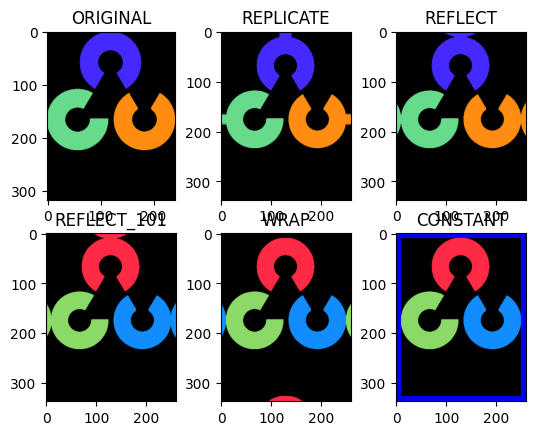

In [24]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

BLUE = [255, 0, 0]
resizeratio = 0.4
img0 = cv2.imread('assets/opencv-logo.png')
img0h, img0w, _ = img0.shape
img1h, img1w = int(img0h * resizeratio), int(img0w * resizeratio)
img1 = cv2.resize(img0, (img1w, img1h))

replicate = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1, 10, 10, 10, 10, cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(
    img1, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=BLUE)

reflect101 = cv2.cvtColor(reflect101, cv2.COLOR_BGR2RGB)

b, g, r = cv2.split(wrap)
wrap = cv2.merge([r, g, b])
constant = constant[:, :, :: -1]


# 显示的不是很明显，还是用 OpenCV 的 imshow 显示
plt.subplot(231), plt.imshow(img1, 'gray'), plt.title('ORIGINAL')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('REPLICATE')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('REFLECT')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('REFLECT_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('WRAP')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('CONSTANT')
plt.show()

# cv2.namedWindow("ORIGINAL")
# cv2.namedWindow("REPLICATE")
# cv2.namedWindow("REFLECT")
# cv2.namedWindow("REFLECT_101")
# cv2.namedWindow("WRAP")
# cv2.namedWindow("CONSTANT")

# cv2.moveWindow("ORIGINAL", 100, 100)
# cv2.moveWindow("REPLICATE", 130 + img1w , 100)
# cv2.moveWindow("REFLECT", 160 + img1w * 2, 100)
# cv2.moveWindow("REFLECT_101", 100, 130 + img1h)
# cv2.moveWindow("WRAP", 130 + img1w , 130  + img1h)
# cv2.moveWindow("CONSTANT", 160 + img1w * 2, 130  + img1h)

# cv2.imshow("ORIGINAL", img1)
# cv2.imshow("REPLICATE", replicate)
# cv2.imshow("REFLECT",reflect)
# cv2.imshow("REFLECT_101",reflect101)
# cv2.imshow("WRAP",wrap)
# cv2.imshow("CONSTANT",constant)

# cv2.waitKey(0)
# cv2.destroyAllWindows()